In [1294]:
import os
import numpy as np
import cv2
import math
from scipy import ndimage
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [1295]:
pip uninstall tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


In [1296]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [1834]:
%%time

# Master list for all angles calculated from different image folders
CalculatedAngleMain_dict = {}
# Directory with all images
path = '/Users/supriyanallan/Desktop/FRAME/Task 2'
# Class to calculate Hough lines for
img_class = 'GiftCards_Rotation'
# Naming convention for images within folder
img_name = 'imgc'
# All folders within image class folder
img_folders = os.listdir(f'{path}/{img_class}')
# List of top n line lengths for each set of lines
lsMaxLengths = {}


try:
    img_folders.remove('.DS_Store')
    img_folders.remove('.ipynb_checkpoints')
except ValueError:
    pass
print(img_folders)    

# Iterate through image class folder
for folder in img_folders:
    print('------')
    print(folder)
    lsRotations = []
    lsCalculatedAngle = []
    lsmax_lengths = []
    for i in range(10):
        print('------')
        print('we rotated the angle by',i*36)
        if i*36 < 180:
            lsRotations.append(i*36)
        else:
            lsRotations.append((i*36)-180)
        
        img_before = cv2.imread(f'{path}/{img_class}/{folder}/{img_name}_{i*36}.png')
        img_gray = cv2.cvtColor(img_before, cv2.COLOR_BGR2GRAY)
        img_edges = cv2.Canny(img_gray, 100, 100, apertureSize=3)
        lines = cv2.HoughLinesP(img_edges, 1, math.pi / 180.0, 100, minLineLength=100, maxLineGap=5)
        lengths_angles_dict = {}
        
        #lsLinesLengths2 = []
        for [[x1, y1, x2, y2]] in lines:
            cv2.line(img_before, (x1, y1), (x2, y2), (255, 0, 0), 3)
            angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
            length = np.linalg.norm(np.array((x1,y1))-np.array((x2,y2)))
            lengths_angles_dict[length] = angle
        #lsLinesLengths1.append(lsLinesLengths2)
        
        # n longest line lengths to query, if you want to use all lines to calculate angle set to len(list(lengths_angles_dict.keys()))
        n = 15
        max_lengths = sorted(lengths_angles_dict.keys(), reverse=True)[:n]
        lsmax_lengths.append(max_lengths)
        angles = []
        for key in max_lengths:
               angles.append(lengths_angles_dict[key])


        median_angle = np.median(angles)
        median_angle_alt = 0
        if median_angle > 0:
            median_angle_alt = 180 - median_angle
        else:
            median_angle_alt = -1* median_angle
        lsCalculatedAngle.append(median_angle_alt)
        #img_rotated = ndimage.rotate(img_before, median_angle)
    
        print(f"Hough Angle is {median_angle:.04f}")
        print(f"Hough Angle Corrected is {median_angle_alt:.04f}")
     
    lsMaxLengths[folder] = lsmax_lengths
    CalculatedAngleMain_dict[folder] = lsCalculatedAngle
    #LineLengthsMain[folder] = lsLinesLengths1
        
    #cv2.imshow("Detected lines", img_before)    
    #key = cv2.waitKey(0)
    #cv2.imwrite('rotated.jpg', img_rotated) 

['GC_1', 'GC_5', 'GC_2', 'GC_3', 'GC_4']
------
GC_1
------
we rotated the angle by 0
Hough Angle is -0.5305
Hough Angle Corrected is 0.5305
------
we rotated the angle by 36
Hough Angle is -34.8809
Hough Angle Corrected is 34.8809
------
we rotated the angle by 72
Hough Angle is 17.9942
Hough Angle Corrected is 162.0058
------
we rotated the angle by 108
Hough Angle is 45.0000
Hough Angle Corrected is 135.0000
------
we rotated the angle by 144
Hough Angle is 35.1286
Hough Angle Corrected is 144.8714
------
we rotated the angle by 180
Hough Angle is -1.8476
Hough Angle Corrected is 1.8476
------
we rotated the angle by 216
Hough Angle is 45.0000
Hough Angle Corrected is 135.0000
------
we rotated the angle by 252
Hough Angle is 15.1240
Hough Angle Corrected is 164.8760
------
we rotated the angle by 288
Hough Angle is -17.0674
Hough Angle Corrected is 17.0674
------
we rotated the angle by 324
Hough Angle is 34.1145
Hough Angle Corrected is 145.8855
------
GC_5
------
we rotated the a

In [1835]:
np.median(lsMaxLengths['GC_5'][1])

309.2313050129304

In [1825]:
# Dictionary with folder names as keys that give the MSE for each of the images
MSE_dict = {}
for key in list(CalculatedAngleMain_dict.keys()):
    MSE_dict[key] = math.sqrt(mean_squared_error(lsRotations, CalculatedAngleMain_dict[key]))

In [1826]:
MSE_dict.values()

dict_values([59.61123144182063, 41.21746227240933, 75.7974118490999, 6.120425652904788, 42.09935374085112])

In [1827]:
from statistics import mean

In [1828]:
mean(MSE_dict.values())

44.96917699141715

In [1829]:
MAE_dict = {}
for key in list(CalculatedAngleMain_dict.keys()):
    MAE_dict[key] = (mean_absolute_error(lsRotations, CalculatedAngleMain_dict[key])) 

In [1830]:
MAE_dict.values()


dict_values([40.60684766580043, 18.851863928200736, 63.5195109952583, 4.9803672937673396, 19.43795837007718])

In [1831]:
mean(MAE_dict.values())

29.4793096506208

In [1832]:
lsCalculatedAngle1 = CalculatedAngleMain_dict['GC_1']
lsCalculatedAngle2 = CalculatedAngleMain_dict['GC_2']
lsCalculatedAngle3 = CalculatedAngleMain_dict['GC_3']
lsCalculatedAngle4 = CalculatedAngleMain_dict['GC_4']
lsCalculatedAngle5 = CalculatedAngleMain_dict['GC_5']

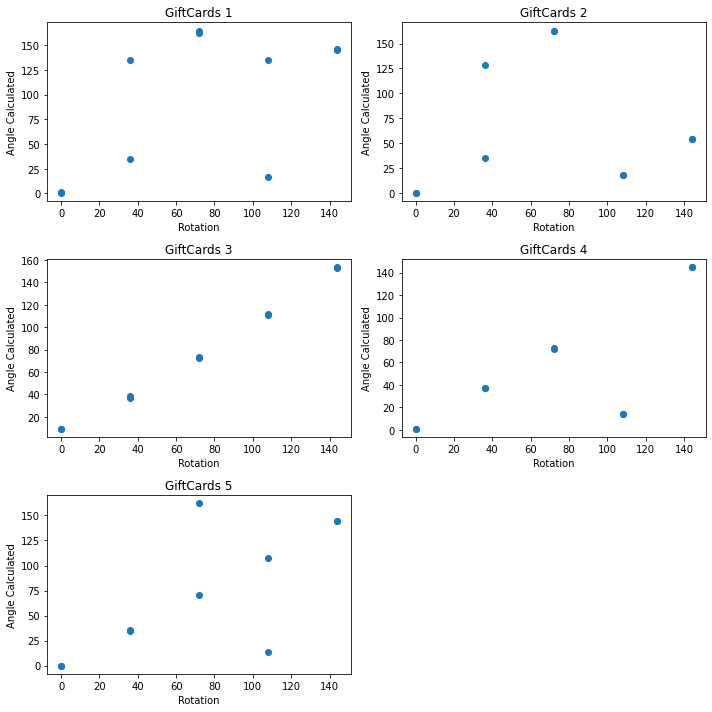

In [1833]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3, 2, figsize = (10,10))

axis[0, 0].scatter(lsRotations, lsCalculatedAngle1)
axis[0, 0].set_title("GiftCards 1")
  
axis[0, 1].scatter(lsRotations, lsCalculatedAngle2)
axis[0, 1].set_title("GiftCards 2")

axis[1, 0].scatter(lsRotations, lsCalculatedAngle3)
axis[1, 0].set_title("GiftCards 3")
 
# For Tanh Function
axis[1, 1].scatter(lsRotations, lsCalculatedAngle4)
axis[1, 1].set_title("GiftCards 4")

axis[2, 0].scatter(lsRotations, lsCalculatedAngle5)
axis[2, 0].set_title("GiftCards 5")

for ax in axis.flat:
    ax.set(xlabel='Rotation', ylabel='Angle Calculated')

figure.delaxes(axis[2,1])
# Combine all the operations and display
plt.tight_layout()
plt.show()

In [ ]:
np.corrcoef(lsRotations,lsCalculatedAngle2)

In [ ]:
sns.regplot(lsRotations, lsCalculatedAngle5)
plt.xlabel("Wall rotations")
plt.ylabel("Angle Calculated")
plt.title("A plot to show correlation between Wall rotations and angle calculated")

In [1]:
test = {1:'a',2:'b',3:'c'}

In [5]:
test[]

TypeError: unhashable type: 'list'